In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from utils import make_grid_data, plot_flow2D, plot_object2D, object_density, flow_density
from utils import load_object

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

%matplotlib inline

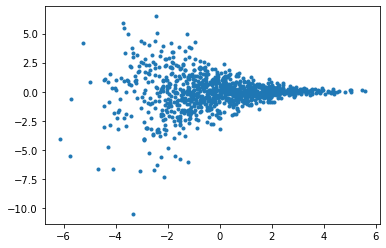

In [3]:
obj = Funnel()
X = obj.sample(1000)
plt.plot(X[:, 0], X[:, 1], '.')

In [4]:
# Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring
save_path = './saved_flows/'

d = 1
D = 2
layers = 20
sample_size = 1000000
batch_size = 100
#iterations = 10000
lr = 0.001
weight_decay = 0.01

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

n_x, n_y = 500, 500
x_interval, y_interval = np.linspace(-7, 7, n_x), np.linspace(-7, 7, n_y)
grid_x, grid_y, X = make_grid_data(x_interval, y_interval)

i = 0
flows = []
for name in names:
    flow = load_object(save_path+name+str(i))
    flows.append(flow)

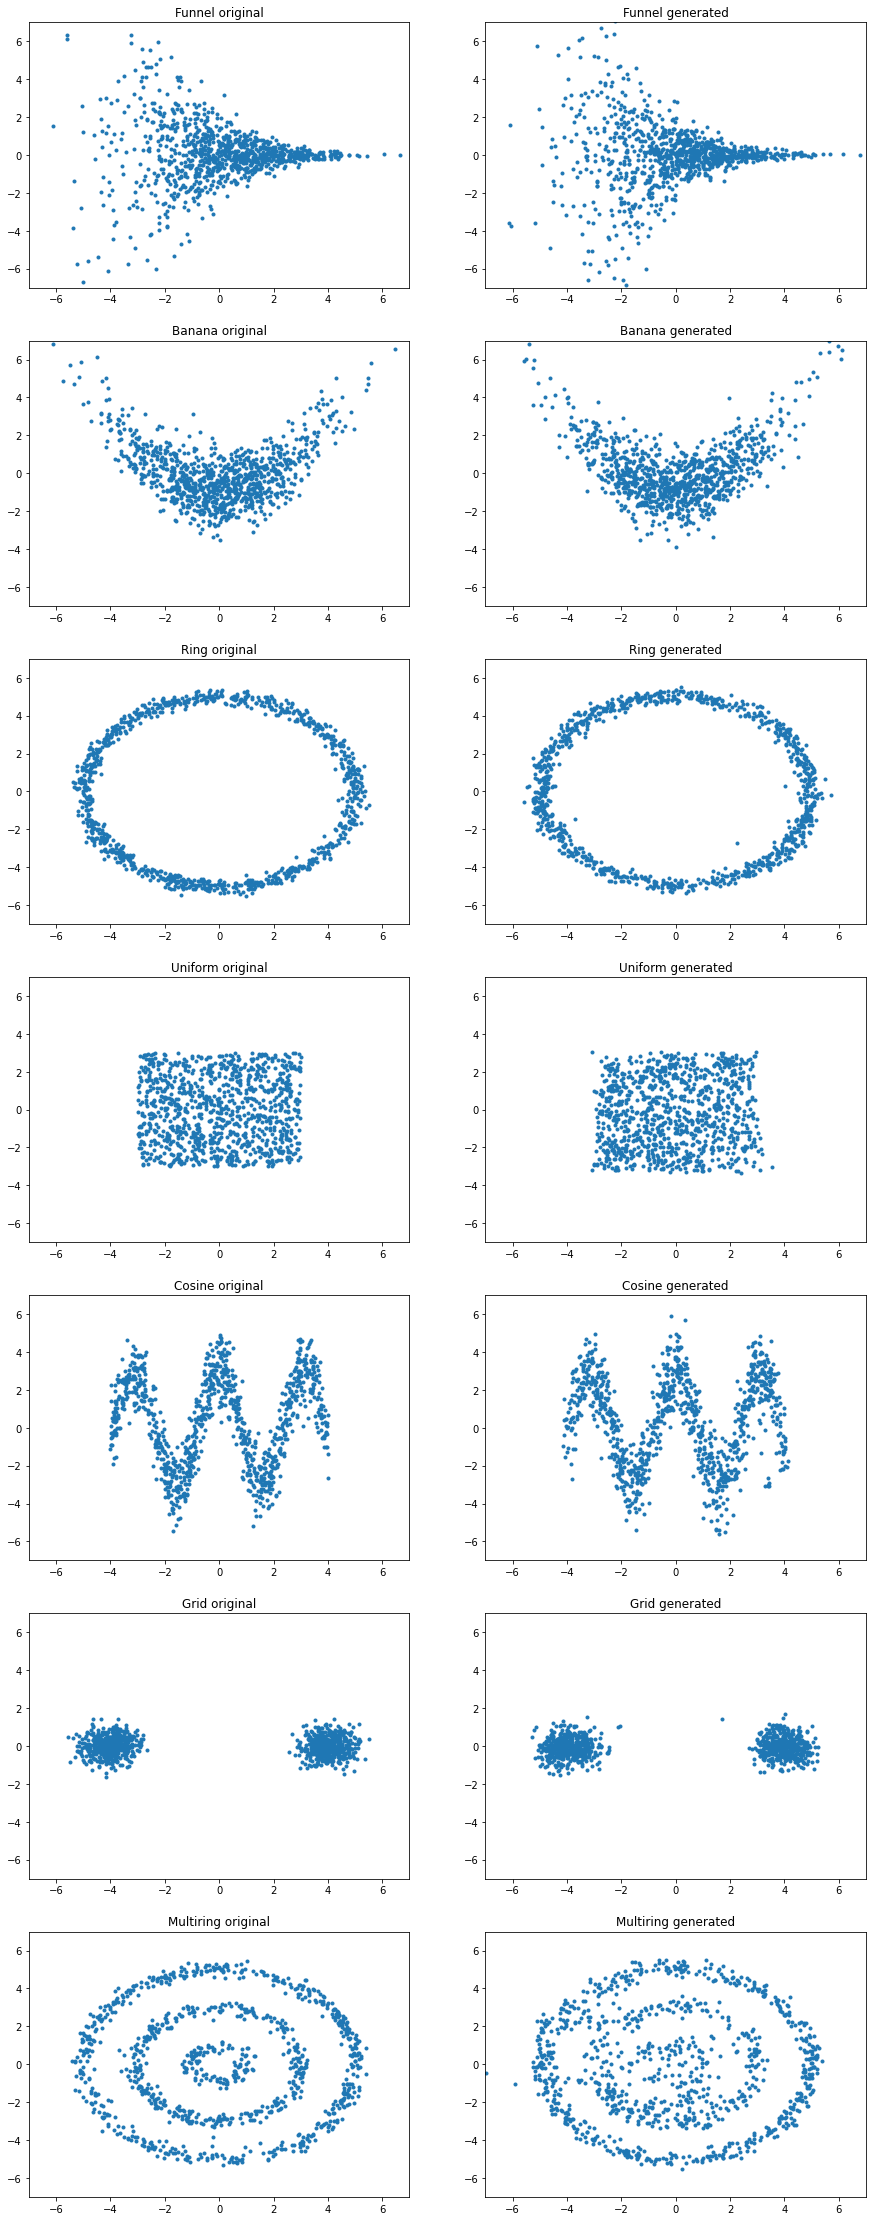

In [5]:
plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    X_obj = obj.sample(1000)
    
    plt.subplot(7, 2, 2*i+1)
    plt.plot(X_obj[:, 0], X_obj[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')

    X_flow = flow.sample(1000)

    plt.subplot(7, 2, 2*i+2)
    plt.plot(X_flow[:, 0], X_flow[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')

In [6]:
# Precompute object densities
pX_objs = []
for i in range(len(names)):
    obj = objs[i]
    name = names[i]
    
    pX_obj = object_density(obj, X).reshape(n_x, n_y)
    pX_objs.append(pX_obj)
    
    print(name)

# Precompute flow densities
pX_flows = []
for i in range(len(names)):
    flow = flows[i]
    name = names[i]
    
    pX_flow = flow_density(flow, X).reshape(n_x, n_y)
    pX_flows.append(pX_flow)
    
    print(name)

Funnel
Banana
Ring
Uniform
Cosine
Grid
Multiring
Funnel
Banana
Ring
Uniform
Cosine
Grid
Multiring


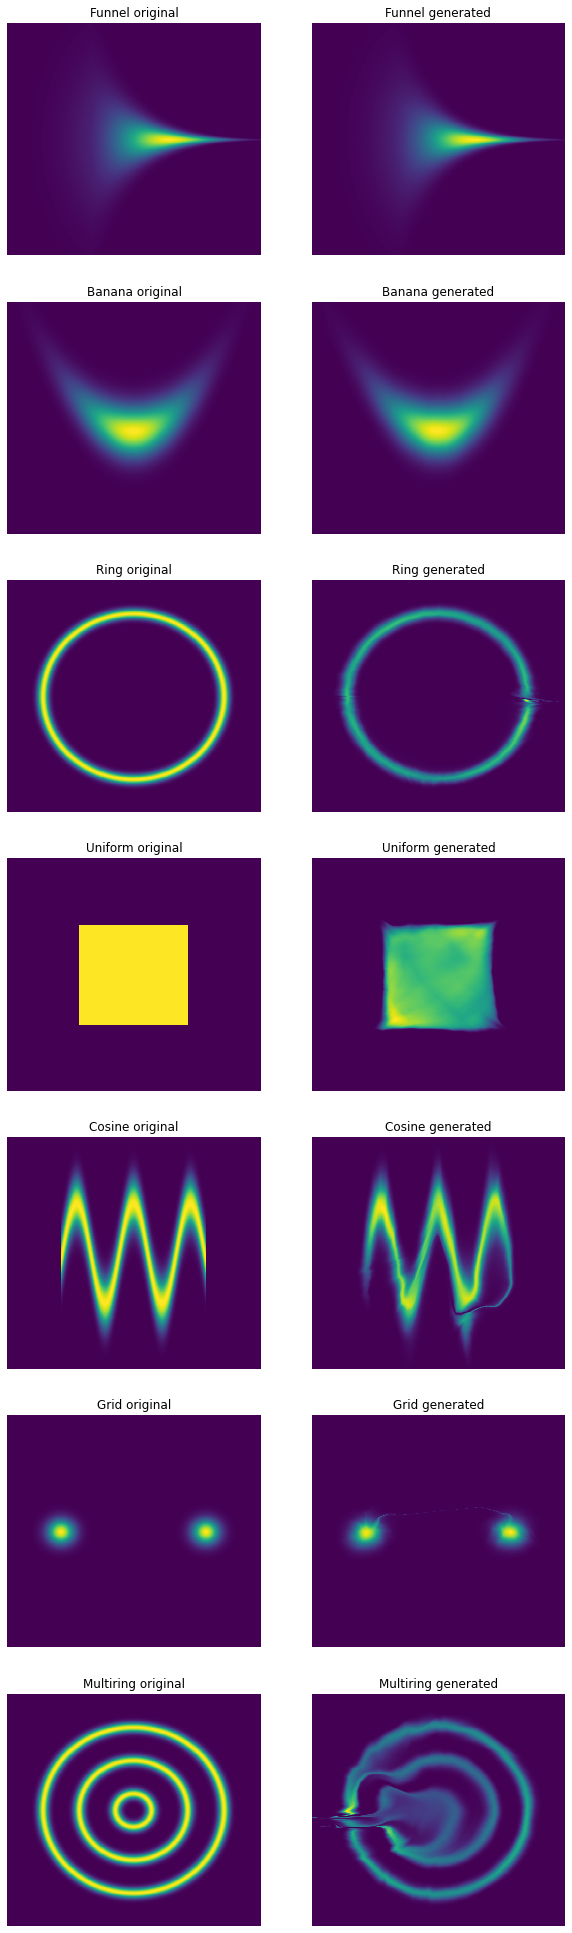

In [7]:
plt.figure(figsize=(10, 35))
for i in range(len(names)):
    name = names[i]
    pX_obj = pX_objs[i]
    pX_flow = pX_flows[i]
    
    plt.subplot(7, 2, 2*i+1)
    plt.pcolormesh(grid_x, grid_y, pX_obj, shading='auto')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')
    plt.axis('off')
    
    plt.subplot(7, 2, 2*i+2)
    plt.pcolormesh(grid_x, grid_y, pX_flow, shading='auto')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')
    plt.axis('off')

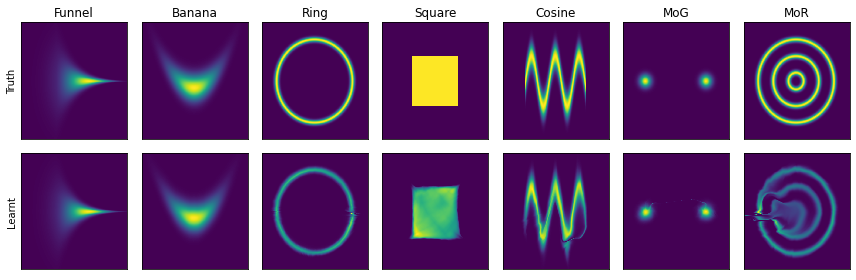

In [8]:
plot_names = ['Funnel', 'Banana', 'Ring', 'Square', 'Cosine', 'MoG', 'MoR']

plt.figure(figsize=(12, 4))
for i in range(len(names)):
    name = plot_names[i]
    pX_obj = pX_objs[i]
    pX_flow = pX_flows[i]
    
    plt.subplot(2, 7, i+1)
    plt.pcolormesh(grid_x, grid_y, pX_obj, shading='auto')
    plt.axis([-7, 7, -7, 7])
    plt.title(name)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Truth')
        
    plt.subplot(2, 7, i+8)
    plt.pcolormesh(grid_x, grid_y, pX_flow, shading='auto')
    plt.axis([-7, 7, -7, 7])
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Learnt')

plt.tight_layout()